<a href="https://colab.research.google.com/github/jhnnxyz/AI-Mixtape/blob/main/notebooks/00_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/jhnnxyz/AI-Mixtape.git
%cd AI-Mixtape/
%env PYTHONPATH=.:$PYTHONPATH
!pip install fastai --upgrade
from fastai.vision.all import *

In [22]:
path = untar_data(URLs.PETS)/'images'
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.181475,0.024094,0.010149,00:57


epoch,train_loss,valid_loss,error_rate,time
0,0.070292,0.025317,0.005413,00:55


Is this a cat?: False.
Probability it's a cat: 0.000017


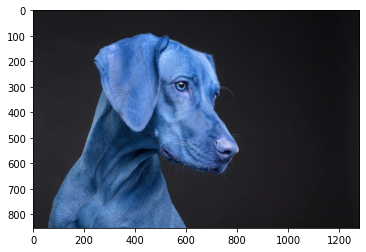

In [24]:
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display

img = '/content/brown-dog-names-cover-image.jpg'
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
img = cv.imread(img) # reads image
plt.imshow(img)

Is this a cat?: True.
Probability it's a cat: 1.000000


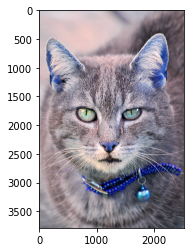

In [25]:
img = '/content/R.78315eb437003b1f6ad1187f4dc3e905.jpeg'
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
img = cv.imread(img) # reads image
plt.imshow(img)